In [ ]:
import tensorflow as tf

## Functional API를 이용한 모델의 정의

* Functional API를 이용 시, 생성한 Layer 객체들을 하나의 함수처럼 사용 하고 이들을 조합하여 모델 정의

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
# 1. Input Layer 생성
#   - `Input` 객체를 사용해서, 입력의 shape(모양)과 dtype(데이터형)을 묘사
#   - shape 인자는 샘플당 으로, 배치 크기를 포함하지 않음
input = layers.Input(shape=(16,))

In [ ]:
# 2. 모델 정의
#   - 사전에 정의 된 Layer 객체를 생성 후 이전 layer 의 연산 결과를 인자로 전달하여 해당 객체 호출(layer 클래스의 call 함수 호출됨)
#   - 호출 결과로 call 함수의 연산이 수행된 결과를 반환
#   - 반환된 결과를 다음 Layer 객체에 전달하여 전체 모델 정의
x = layers.Dense(units=32, activation='relu')(input)
x = layers.Dropout(rate=0.5)(x)
output = layers.Dense(units=10)(x)

In [ ]:
# 3. 모델 생성
#   - Functional API를 이용한 `모델(Model)`은 입력과 출력을 명시하여 정의합
#   - 이렇게 생성한 모델은 다른 Layer들과 마찬가지로 스스로가 또 하나의 Layer
model = models.Model(
    inputs=[input],
    outputs=[output],
    name='first_functional_API_model'
)

In [ ]:
# 4. 모델 정보 확인
#   - Functional API를 이용한 `모델(Model)`은 compile 되기전, 이미 가중치를 가짐
#   - 그 이유는 입력에 대한 shape을 `input` Layer 에서 정의했기 때문
len(model.weights)

4

In [ ]:
model.summary()

Model: "first_funtional_API_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 874
Trainable params: 874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 5. 모델을 호출
#   - input layer에서 정의한 크기에 적합한 값을 모델에 전달하여 호출
#   - 정의된 연산의 수행 결과를 반환
model(tf.ones((2, 16)))

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[-0.39108622, -0.02774232,  0.18847075, -0.73393834, -0.11841038,
        -0.36895436,  0.34820977,  0.531235  ,  0.00359024, -0.04442176],
       [-0.39108622, -0.02774232,  0.18847075, -0.73393834, -0.11841038,
        -0.36895436,  0.34820977,  0.531235  ,  0.00359024, -0.04442176]],
      dtype=float32)>

In [ ]:
from tensorflow.keras.utils import plot_model

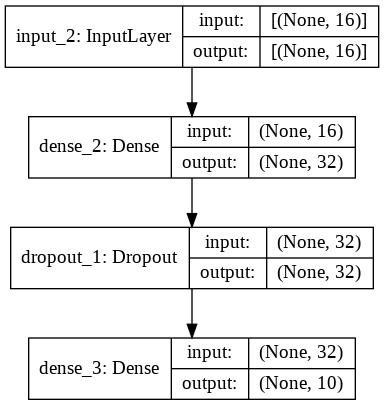

In [ ]:
plot_model(model, show_shapes=True)

* 단일 input과 단일 out을 같는 DAG 모델은 `Sequential` 클래스를 사용하여 모델 구성

In [ ]:
model = models.Sequential([
  layers.Dense(units=32, activation='relu',input_shape=(16,)),
  layers.Dropout(rate=0.5),
  layers.Dense(units=10)
])

In [ ]:
len(model.weights)

4

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 874
Trainable params: 874
Non-trainable params: 0
_________________________________________________________________


* Sequentail API를 이용하여 모델 구현 시 Input layer을 직접 정의 가능

In [ ]:
model = models.Sequential([
  layers.InputLayer(input_shape=(16,)),
  layers.Dense(units=32),
  layers.Dropout(rate=0.5),
  layers.Dense(units=10)
])

In [ ]:
len(model.weights)

4

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 874
Trainable params: 874
Non-trainable params: 0
_________________________________________________________________


* Sequentail API를 이용하여 모델 구현 시 Input shape 정보를 전달하지 않으면 모델의 가중치가 생성되지 않음(Layer class의 `build` 메서드가 실행되지 않음)

In [ ]:
model = models.Sequential([
  layers.Dense(units=32),
  layers.Dropout(rate=0.5),
  layers.Dense(units=10)
])

In [ ]:
len(model.weights)

In [ ]:
model.summary()

* 모델에 input 데이터를 전달하여 input 데이터의 shape 정보가 파악 되면 모델의 가중치가 생성됨

In [ ]:
model(tf.ones((2, 16)))

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[-0.03016624,  0.5550156 ,  1.1318791 ,  0.4264047 ,  0.01795626,
         0.13777117,  0.2855281 , -1.6959474 , -0.77286476,  0.07898781],
       [-0.03016624,  0.5550156 ,  1.1318791 ,  0.4264047 ,  0.01795626,
         0.13777117,  0.2855281 , -1.6959474 , -0.77286476,  0.07898781]],
      dtype=float32)>

In [ ]:
len(model.weights)

4

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (2, 32)                   544       
_________________________________________________________________
dropout_5 (Dropout)          (2, 32)                   0         
_________________________________________________________________
dense_11 (Dense)             (2, 10)                   330       
Total params: 874
Trainable params: 874
Non-trainable params: 0
_________________________________________________________________
